# Alejandro Herrera
# MAT 345, DigiPen, Fall 2025
# Programming Assignment 1

In [26]:
# IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pathlib import Path


In [10]:
# CONFIG

data_path = "data_clean/redfin_clean_data.csv"  # Column names were standardized already
min_sqft = 200
min_price = 1
min_year = 1900


In [19]:
# CSV LOAD AND DATA TYPE CONFIRMATION/COERCION

df = pd.read_csv(data_path)

df["PRICE"] = pd.to_numeric(df["PRICE"], errors="coerce")
df["SQUARE_FEET"] = pd.to_numeric(df["SQUARE_FEET"], errors="coerce")
df["PRICE_PER_SQUARE_FEET"] = pd.to_numeric(df["PRICE_PER_SQUARE_FEET"], errors="coerce")
df["SOLD_DATE"] = pd.to_datetime(df["SOLD_DATE"], errors="coerce")
df["ZIP"] = pd.to_numeric(df["ZIP"], errors="coerce")
df["YEAR_BUILT"] = pd.to_numeric(df["YEAR_BUILT"], errors="coerce")

print("Loaded rows:", len(df))
display(df.head())


Loaded rows: 350


,SALE_TYPE,SOLD_DATE,PROPERTY_TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,...,PRICE_PER_SQUARE_FEET,HOA_PER_MONTH,STATUS,URL,SOURCE,MLS,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,2025-06-09,Condo/Co-op,12505 NE 116th St Unit A10,Kirkland,WA,98034,407000,2.0,1.0,...,441.0,489.0,Sold,https://www.redfin.com/WA/Kirkland/12505-NE-11...,NWMLS as Distributed by MLS Grid,2391648.0,N,Y,47.703553,-122.173867
1,PAST SALE,2025-05-02,Vacant Land,7532 123rd Ave NE,Kirkland,WA,98033,1325000,NaN,NaN,...,NaN,NaN,Sold,https://www.redfin.com/WA/Kirkland/7532-123rd-...,NWMLS as Distributed by MLS Grid,2343465.0,N,Y,47.672635,-122.175631
2,PAST SALE,2025-08-15,Condo/Co-op,935 1st St S #4,Kirkland,WA,98033,1300000,2.0,1.0,...,1221.0,475.0,Sold,https://www.redfin.com/WA/Kirkland/935-1st-St-...,NWMLS as Distributed by MLS Grid,2409221.0,N,Y,47.668248,-122.206130
3,PAST SALE,2025-08-19,Single Family Residential,13810 SE 51st Pl,Bellevue,WA,98006,1960000,4.0,3.0,...,598.0,NaN,Sold,https://www.redfin.com/WA/Bellevue/13810-SE-51...,NWMLS as Distributed by MLS Grid,2401684.0,N,Y,47.556691,-122.155496
4,PAST SALE,2025-04-30,Condo/Co-op,4173 W Lake Sammamish Pkwy SE Unit A103,Bellevue,WA,98008,450000,2.0,1.5,...,505.0,489.0,Sold,https://www.redfin.com/WA/Bellevue/4173-W-Lake...,NWMLS as Distributed by MLS Grid,2347614.0,N,Y,47.570252,-122.102283


In [21]:
# TARGET LAST 6 MONTHS AND DROP N/A

end_date = pd.Timestamp.today().normalize()
start_date = end_date - pd.DateOffset(months=6)
df = df[(df["SOLD_DATE"] >= start_date) & (df["SOLD_DATE"] <= end_date)]
df = df.dropna(subset=["PRICE", "SQUARE_FEET", "ZIP", "SOLD_DATE"])

print("Loaded rows:", len(df))
display(df.head())


Loaded rows: 304


,SALE_TYPE,SOLD_DATE,PROPERTY_TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,...,PRICE_PER_SQUARE_FEET,HOA_PER_MONTH,STATUS,URL,SOURCE,MLS,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,2025-06-09,Condo/Co-op,12505 NE 116th St Unit A10,Kirkland,WA,98034,407000,2.0,1.0,...,441.0,489.0,Sold,https://www.redfin.com/WA/Kirkland/12505-NE-11...,NWMLS as Distributed by MLS Grid,2391648.0,N,Y,47.703553,-122.173867
2,PAST SALE,2025-08-15,Condo/Co-op,935 1st St S #4,Kirkland,WA,98033,1300000,2.0,1.0,...,1221.0,475.0,Sold,https://www.redfin.com/WA/Kirkland/935-1st-St-...,NWMLS as Distributed by MLS Grid,2409221.0,N,Y,47.668248,-122.206130
3,PAST SALE,2025-08-19,Single Family Residential,13810 SE 51st Pl,Bellevue,WA,98006,1960000,4.0,3.0,...,598.0,NaN,Sold,https://www.redfin.com/WA/Bellevue/13810-SE-51...,NWMLS as Distributed by MLS Grid,2401684.0,N,Y,47.556691,-122.155496
4,PAST SALE,2025-04-30,Condo/Co-op,4173 W Lake Sammamish Pkwy SE Unit A103,Bellevue,WA,98008,450000,2.0,1.5,...,505.0,489.0,Sold,https://www.redfin.com/WA/Bellevue/4173-W-Lake...,NWMLS as Distributed by MLS Grid,2347614.0,N,Y,47.570252,-122.102283
5,PAST SALE,2025-05-29,Townhouse,12601 Sunbreak Way NE,Redmond,WA,98053,980000,2.0,2.5,...,516.0,340.0,Sold,https://www.redfin.com/WA/Redmond/12601-Sunbre...,NWMLS as Distributed by MLS Grid,2371791.0,N,Y,47.711538,-122.034945


In [23]:
# STATISTICAL DATA FOR SPECIFIC COLUMNS

df_stats = pd.DataFrame({
    "price_mean":[df["PRICE"].mean()],
    "price_median":[df["PRICE"].median()],
    "price_std":[df["PRICE"].std()],
    "sqft_mean":[df["SQUARE_FEET"].mean()],
    "sqft_median":[df["SQUARE_FEET"].median()],
    "sqft_std":[df["SQUARE_FEET"].std()],
    "n":[len(df)]
})

display(df_stats)

,price_mean,price_median,price_std,sqft_mean,sqft_median,sqft_std,n
0,1.843997e+06,1427500.0,1.776771e+06,2230.595395,1935.0,1168.089178,304


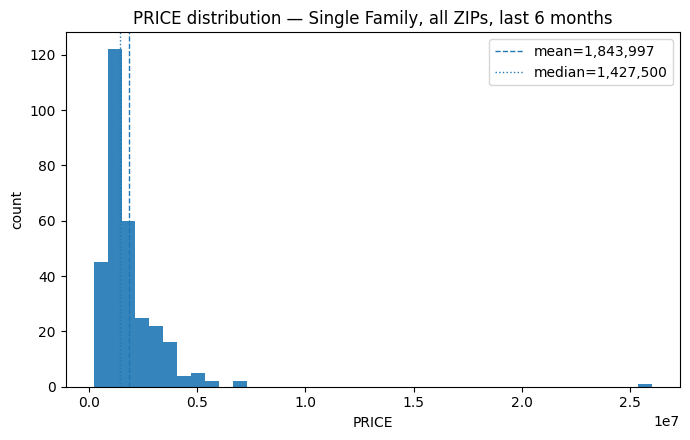

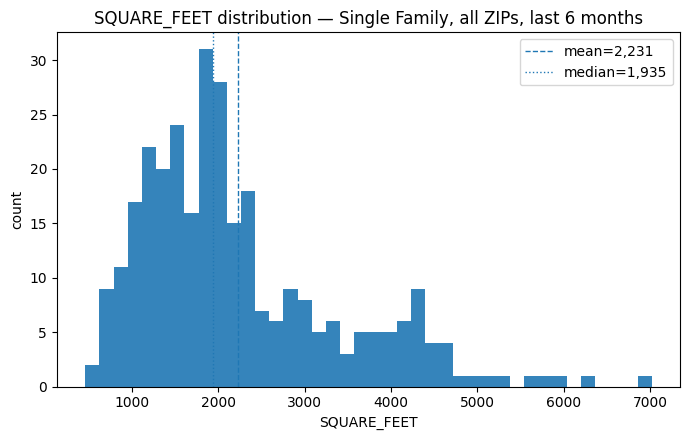

In [25]:
# HISTOGRAMS

# === Combined Histograms (all ZIPs together) ===
for col, bins in [("PRICE", 40), ("SQUARE_FEET", 40)]:
    plt.figure(figsize=(7,4.5))
    plt.hist(df[col].dropna(), bins=bins, alpha=0.9)
    plt.axvline(df[col].mean(), linestyle="--", linewidth=1, label=f"mean={df[col].mean():,.0f}")
    plt.axvline(df[col].median(), linestyle=":", linewidth=1, label=f"median={df[col].median():,.0f}")
    plt.title(f"{col} distribution — Single Family, all ZIPs, last 6 months")
    plt.xlabel(col); plt.ylabel("count"); plt.legend(); plt.tight_layout()
    plt.show()

# HYPOTHESIS TESTING: Bellevue VS Redmond

Null hypothesis (H₀):

Mean price in Bellevue ≥ Mean price in Redmond
(Bellevue is at least as expensive or more expensive than Redmond)

Alternative hypothesis (H₁):

Mean price in Bellevue < Mean price in Redmond
(Bellevue is actually cheaper than Redmond)

In [35]:
# Can change city A and B to be "Bellevue", "Redmond", or "Kirkland" to try different test!
# Test assumes A price is greater than B price for Hypothesis.
city_a = "Bellevue"
city_b = "Redmond"

prices_a = df.loc[df["CITY"].str.lower() == city_a.lower(), "PRICE"].dropna()
prices_b = df.loc[df["CITY"].str.lower() == city_b.lower(), "PRICE"].dropna()
print(f"{city_a}: n={len(prices_a)}, mean=${prices_a.mean():,.0f}")
print(f"{city_b}: n={len(prices_b)}, mean=${prices_b.mean():,.0f}")

# T-Test
t_stat, p_val_two_sided = stats.ttest_ind(prices_a, prices_b, equal_var=False)

# One-sided adjustment: H0 is A >= B, H1 is A < B
if prices_a.mean() < prices_b.mean():
    p_val_one_sided = p_val_two_sided / 2
else:
    p_val_one_sided = 1 - (p_val_two_sided / 2)

print("t-statistic:", t_stat)
print("two-sided p-value:", p_val_two_sided)
print(f"one-sided p-value ({city_a} < {city_b}):", p_val_one_sided)

alpha = 0.05
if p_val_one_sided < alpha:
    print(f"Reject H0: {city_a} is significantly cheaper than {city_b} (p={p_val_one_sided:.4f})")
else:
    print(f"Fail to reject H0: No significant evidence {city_a} is cheaper than {city_b} (p={p_val_one_sided:.4f})")

Bellevue: n=124, mean=$2,151,594
Redmond: n=63, mean=$1,522,142
t-statistic: 2.588204133274286
two-sided p-value: 0.010491247169595303
one-sided p-value (Bellevue < Redmond): 0.9947543764152024
Fail to reject H0: No significant evidence Bellevue is cheaper than Redmond (p=0.9948)


Coder's Note: OUCH. I expected Bellevue to be more, but not so much more. And maybe just not so crazy...

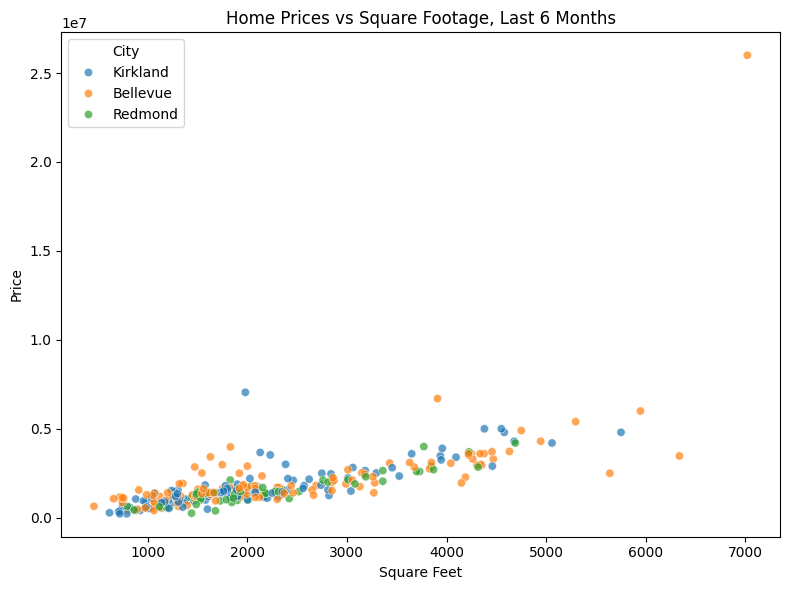

In [45]:
# SCATTERPLOTS: SQUARE FOOTAGE VS PRICE

# Focusing on Kirkland, Bellevue, and Redmond
cities = ["Kirkland", "Bellevue", "Redmond"]
df_cities = df[df["CITY"].isin(cities)].copy()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cities, x="SQUARE_FEET", y="PRICE", hue="CITY", alpha=0.7)
plt.title("Home Prices vs Square Footage, Last 6 Months")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.legend(title="City")
plt.tight_layout()
plt.show()

UH OH. SUPER OUTLIER DETECTED.
Lets rerun the numbers after we remove it. Stupid mansion. Hence the crazy disparity earlier...


In [42]:
price_cap = df["PRICE"].quantile(0.99)
df_no_outlier = df[df["PRICE"] <= price_cap].copy()

stats_trimmed = pd.DataFrame({
    "price_mean":[df_no_outlier["PRICE"].mean()],
    "price_median":[df_no_outlier["PRICE"].median()],
    "price_std":[df_no_outlier["PRICE"].std()],
    "sqft_mean":[df_no_outlier["SQUARE_FEET"].mean()],
    "sqft_median":[df_no_outlier["SQUARE_FEET"].median()],
    "sqft_std":[df_no_outlier["SQUARE_FEET"].std()],
    "n":[len(df_no_outlier)]
})

display(stats_trimmed)

,price_mean,price_median,price_std,sqft_mean,sqft_median,sqft_std,n
0,1.716087e+06,1420000.0,1.001967e+06,2197.483333,1925.5,1117.606396,300


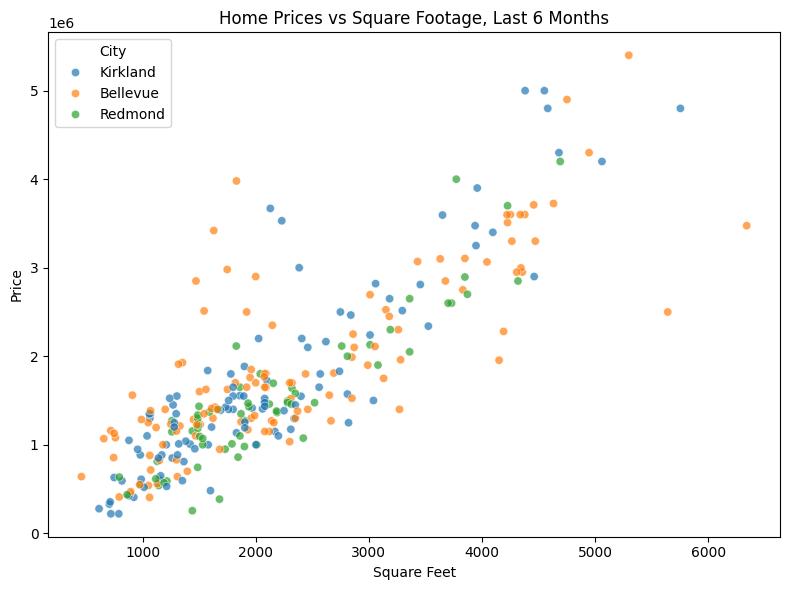

In [44]:
cities = ["Kirkland", "Bellevue", "Redmond"]
df_cities = df_no_outlier[df_no_outlier["CITY"].isin(cities)].copy()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cities, x="SQUARE_FEET", y="PRICE", hue="CITY", alpha=0.7)
plt.title("Home Prices vs Square Footage, Last 6 Months")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.legend(title="City")
plt.tight_layout()
plt.show()

In [46]:
city_a = "Bellevue"
city_b = "Redmond"

prices_a = df_no_outlier.loc[df["CITY"].str.lower() == city_a.lower(), "PRICE"].dropna()
prices_b = df_no_outlier.loc[df["CITY"].str.lower() == city_b.lower(), "PRICE"].dropna()
print(f"{city_a}: n={len(prices_a)}, mean=${prices_a.mean():,.0f}")
print(f"{city_b}: n={len(prices_b)}, mean=${prices_b.mean():,.0f}")

# T-Test
t_stat, p_val_two_sided = stats.ttest_ind(prices_a, prices_b, equal_var=False)

# One-sided adjustment: H0 is A >= B, H1 is A < B
if prices_a.mean() < prices_b.mean():
    p_val_one_sided = p_val_two_sided / 2
else:
    p_val_one_sided = 1 - (p_val_two_sided / 2)

print("t-statistic:", t_stat)
print("two-sided p-value:", p_val_two_sided)
print(f"one-sided p-value ({city_a} < {city_b}):", p_val_one_sided)

alpha = 0.05
if p_val_one_sided < alpha:
    print(f"Reject H0: {city_a} is significantly cheaper than {city_b} (p={p_val_one_sided:.4f})")
else:
    print(f"Fail to reject H0: No significant evidence {city_a} is cheaper than {city_b} (p={p_val_one_sided:.4f})")

Bellevue: n=121, mean=$1,885,113
Redmond: n=63, mean=$1,522,142
t-statistic: 2.608271181365738
two-sided p-value: 0.010036259748216224
one-sided p-value (Bellevue < Redmond): 0.9949818701258919
Fail to reject H0: No significant evidence Bellevue is cheaper than Redmond (p=0.9950)


# Much better. I mean these are still rich people prices. But at least the difference is closer, which is what I expected. I could have removed this outlier earlier (and I should have), but I'll keep this in to show the journey.